In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([ 1.55,  1.79,  2.08,  2.46,  3.  ,  3.72,  4.64,  5.77,  7.19,
        8.95, 11.14, 13.87, 17.27, 19.96])

array([2.29612e+03, 8.85220e+02, 3.50350e+02, 1.38690e+02, 5.48200e+01,
       2.41300e+01, 1.26400e+01, 7.75000e+00, 5.34000e+00, 4.00000e+00,
       3.19000e+00, 2.64000e+00, 2.23000e+00, 2.02000e+00])

array([1.2 , 1.36, 1.57, 1.86, 2.27, 2.82, 3.51, 4.37, 5.44, 6.78, 8.44,
       9.96])

array([2.20683e+03, 8.49740e+02, 3.29090e+02, 1.28250e+02, 5.09300e+01,
       2.22100e+01, 1.12900e+01, 6.52000e+00, 3.96000e+00, 2.47000e+00,
       1.64000e+00, 1.29000e+00])

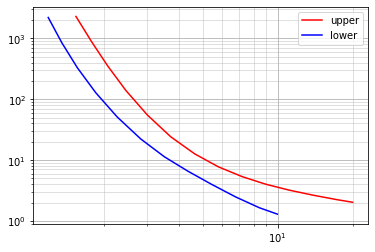

In [4]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

In [6]:
i_m_min_s = '10*f.In'
i_m_max_s = '20*f.In'
T_conv = '3600 if f.In <= 63  else 2*3600'
curve_u = [ ('point', '1.45*f.In', T_conv),
            ("POINTS", 1, "f.In", 0, i_m_max_s, 0.01, list(i_u), list(t_u)),
            ('point', i_m_max_s, 0.01),
            ('point', '1000*f.Isc', 0.01)]
curve_l = [ ('point', '1.13*f.In', T_conv),
            ("POINTS", 1, "f.In", 0, i_m_min_s, 0.001, list(i_l), list(t_l)),
            ('point', i_m_min_s, 0.001),
            ('point', '1000*f.Isc', 0.001)]
curves = {'curve_u': curve_u, 'curve_l': curve_l}
parameters = {}
             
data = {'type'          : 'protection',
        'parameters'    : parameters,
        'data'          : curves,
        'graph_model'   : []}

with open('lnt_mcb_d.json', 'w') as fp:
    json.dump(data, fp, indent=2)